In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
import cv2
import xml.etree.ElementTree as ET 
import numpy as np
import sys
import warnings
warnings.filterwarnings("ignore")
from getBoundingBoxes import *
from corner_detector import *
from getBoxFeatures import *
from anms import *
from utils import *
from estimateAllTranslation import *
from estimateFeatureTranslation import *
from applyBoxTransform import *

In [18]:
# cap = cv2.VideoCapture('vids/Easy.mp4')
# ret,firstFrame = cap.read()
# boxes = getBoundingBoxes()
# gray = cv2.cvtColor(firstFrame,cv2.COLOR_BGR2GRAY)

# boxesData = []

# for box in boxes:
#     boximg = gray[box[1]:box[3],box[0]:box[2]]
#     x,y = getBoxFeatures(boximg,box,100)
#     boxData = {
#         'coords': box,
#         '_x': x,
#         '_y': y
#     }
#     boxesData.append(boxData)

# currentFrame = firstFrame
# _,nextFrame = cap.read()

In [2]:
boxes = getBoundingBoxes('')
currentFrame = cv2.imread('framesMed/0001.png')
nextFrame = cv2.imread('framesMed/0002.png')
gray = cv2.cvtColor(currentFrame,cv2.COLOR_BGR2GRAY)
box = boxes[0]
boximg = gray[box[1]:box[3],box[0]:box[2]]
x,y = getBoxFeatures(boximg,box,10)

TypeError: getBoundingBoxes() missing 1 required positional argument: 'filename'

In [21]:
# Imag, Ix, Iy,Iori=findDerivatives(gray)
# plt.imshow(Imag)
# _x = boxesData[0]['_x']
# _y = boxesData[0]['_y']
for i in range(210,3,-1):
    idx = str(i)
    idx = (idx.zfill(4))
    x,y=estimateAllTranslation(x,y,currentFrame,nextFrame)
    currentFrame = nextFrame
#     print(x.shape)
    plt.imshow(cv2.cvtColor(nextFrame,cv2.COLOR_BGR2RGB))
    fig = plt.gcf()
    ax1 = fig.add_subplot(111)
    ax1.scatter(x,y,c='r',s=0.3)
    plt.savefig("outputs/"+idx+".png")
    nextFrame = cv2.imread("framesMed/"+idx+".png")
#     fig.clf()
    print(idx)
# print(X-x)
# print(Y-y)

0150
0149
0148
0147
0146
0145
0144
0143
0142
0141
0140
0139
0138
0137
0136
0135
0134
0133
0132
0131
0130
0129
0128
0127
0126
0125
0124
0123
0122
0121
0120
0119
0118
0117


IndexError: index 540 is out of bounds for axis 1 with size 540

<Figure size 720x576 with 0 Axes>

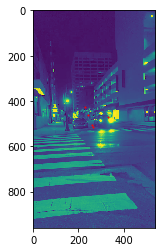

In [8]:
plt.imshow(gray)
fig = plt.gcf()
ax1 = fig.add_subplot(111)
ax1.scatter(x,y,c='r',s=1)

In [ ]:
plt.imshow(cv2.cvtColor(nextFrame,cv2.COLOR_BGR2GRAY))
fig = plt.gcf()
ax1 = fig.add_subplot(111)
ax1.scatter(X,Y,c='r',s=1)


In [ ]:
print(X-x)
print(Y-y)

In [ ]:

h = est_homography(x,y,X,Y)

In [ ]:
pt = np.array([x[0],y[0],1]).T
newpt = h@pt
newpt = newpt/newpt[2]
print(newpt)
print(np.array([X[0],Y[0],1]))

In [ ]:
n = x.shape[0]
stk = np.vstack((x,y,np.ones(n)))

newstk = np.vstack((X,Y,np.ones(n)))

In [ ]:
res=h@stk
res=res/res[2,:]

In [ ]:
# bdata=boxesData[0]['coords']
X,Y,_box = applyBoxTransform(x,y,X,Y,box)

In [ ]:
_box

In [ ]:
box

In [ ]:
h